In [2]:
!pip install tensorflow==2.3.1

     |████████████████████████████████| 320.4MB 45kB/s 
     |████████████████████████████████| 460kB 46.8MB/s 
     |████████████████████████████████| 20.1MB 1.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0


In [3]:
!pip install tensorflow-quantum

     |████████████████████████████████| 5.9MB 5.2MB/s 
     |████████████████████████████████| 5.6MB 24.3MB/s 
     |████████████████████████████████| 1.6MB 39.8MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [4]:
!pip install cirq

In [7]:
#cd /content/drive/MyDrive/Courses & Online Courses/COMP 551/Project

/content/drive/MyDrive/Courses & Online Courses/COMP 551/Project


In [8]:
import tensorflow as tf
import tensorflow_quantum as tfq
import numpy as np
import cirq
import sympy
from cirq.contrib.svg import SVGCircuit

from data_utils import import_data
from circuits import conv_filter_2x2, conv_circuit
from network import encode_circuit, QCNN_model

**Import Data**

In [9]:
# We choose digits 3&6 from the MNIST dataset. Resize them to 6x6

X_train, X_test, Y_train, Y_test = import_data(num1=3,num2=6,size=6, N_train=300, N_test=50) #num1, num2, size, N_train, N_test

print('N_train: ', len(X_train))
print('N_test: ', len(X_test))

11493376/11490434 [==============================] - 0s 0us/step
N_train:  300
N_test:  50


**Encode data to quantum states**

In [10]:
#This is already done in train_model function.

#x_train_tensor = tfq.convert_to_tensor([encode_circuit(x) for x in X_train])
#x_test_tensor = tfq.convert_to_tensor([encode_circuit(x) for x in X_test])

**Convolutional filter**

In [11]:
qubits = cirq.GridQubit.rect(2,2) #define qubits
symbols = sympy.symbols('qconv0:100')
#Convolutional filter
filter = conv_filter_2x2(qubits, symbols)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


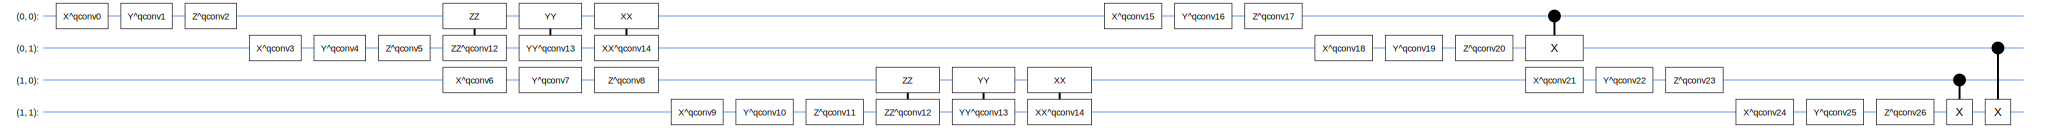

In [12]:
#Visualize
SVGCircuit(filter)

**Whole circuit**

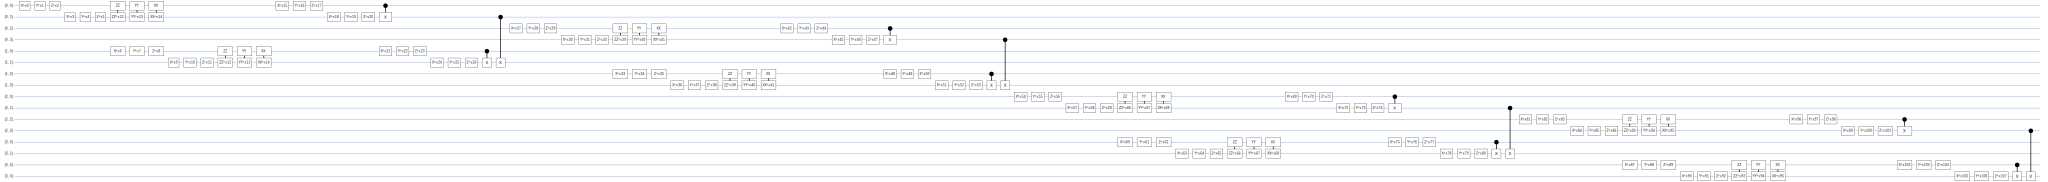

In [13]:
layer = conv_circuit(cirq.GridQubit.rect(4,4), sympy.symbols('x0:200'))
SVGCircuit(layer)


**Build model**

In [14]:
qcnn = QCNN_model(cirq.GridQubit.rect(4,4), conv_circuit)
model_circuit=qcnn.create_model_circuit()
model = qcnn.build_network()

In [15]:
from train import hinge_accuracy, compile_model, train_model

In [16]:
model, history = train_model(model, X_train, Y_train, X_test, Y_test)

Epoch 1/25
19/19 [==============================] - 17s 918ms/step - loss: 0.9979 - hinge_accuracy: 0.5230 - val_loss: 0.9963 - val_hinge_accuracy: 0.7031
Epoch 2/25
19/19 [==============================] - 17s 918ms/step - loss: 0.9889 - hinge_accuracy: 0.6283 - val_loss: 0.9921 - val_hinge_accuracy: 0.5781
Epoch 3/25
19/19 [==============================] - 18s 924ms/step - loss: 0.9718 - hinge_accuracy: 0.6436 - val_loss: 0.9841 - val_hinge_accuracy: 0.5000
Epoch 4/25
19/19 [==============================] - 18s 923ms/step - loss: 0.9438 - hinge_accuracy: 0.6645 - val_loss: 0.9701 - val_hinge_accuracy: 0.5000
Epoch 5/25
19/19 [==============================] - 17s 914ms/step - loss: 0.9053 - hinge_accuracy: 0.7105 - val_loss: 0.9543 - val_hinge_accuracy: 0.4062
Epoch 6/25
19/19 [==============================] - 17s 916ms/step - loss: 0.8639 - hinge_accuracy: 0.7050 - val_loss: 0.9384 - val_hinge_accuracy: 0.4062
Epoch 7/25
19/19 [==============================] - 17s 915ms/step - l

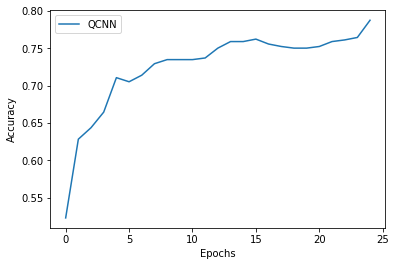

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['hinge_accuracy'], label='QCNN')
#plt.plot(hybrid_history.history['val_custom_accuracy'], label='Hybrid CNN')
#plt.title('Quantum vs Hybrid CNN performance')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

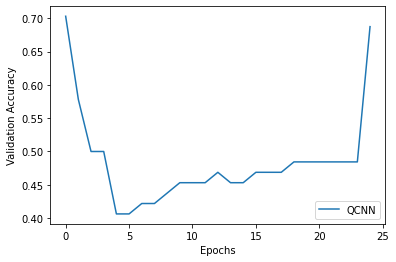

In [19]:
plt.plot(history.history['val_hinge_accuracy'], label='QCNN')
#plt.plot(hybrid_history.history['val_custom_accuracy'], label='Hybrid CNN')
#plt.title('Quantum vs Hybrid CNN performance')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Validation Accuracy')
plt.show()